In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfftn, fftfreq, rfftfreq

In [3]:
#box size in Mpc
L=1000
volume=L**3
#number of points
n_points=100000
density=n_points/volume
#create the particles
x,y,z = np.random.uniform(0,L,size=(3,n_points))



In [4]:
#create the density in the grid
n_cells = 64
cell_side=L/n_cells

#compute the mean density in the cell
cell_mean_density = n_points/n_cells**3

#create the grid with his histogramm
grid, edges=np.histogramdd((x, y, z), bins=(n_cells,n_cells,n_cells), range=((0,L),(0,L),(0,L)))
density_field=(grid-cell_mean_density)/cell_mean_density

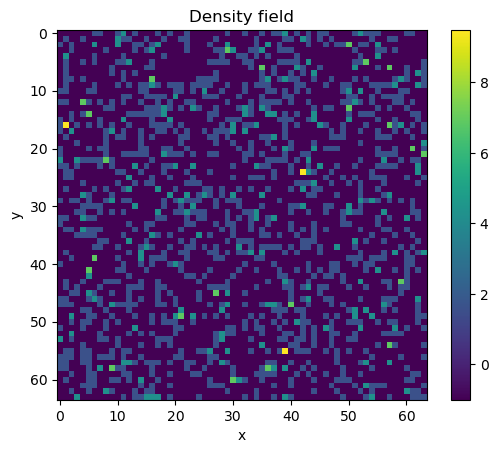

In [5]:
cb=plt.imshow(density_field[:,:,0], )
plt.colorbar(cb)
plt.title("Density field")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
#compute the delta in fourier space
delta_k = rfftn(density_field)/n_cells**3


In [7]:
#create the k grid
kF=2*np.pi/L
H=L/n_cells
kN=np.pi/H
kx=fftfreq(n_cells, d=1/n_cells)*kF
ky=fftfreq(n_cells, d=1/n_cells)*kF
kz=rfftfreq(n_cells, d=1/n_cells)*kF


In [8]:
KX, KY, KZ = np.meshgrid(kx, ky, kz)
KK=np.sqrt(KX**2 + KY**2 + KZ**2)

In [9]:
pk_grid=delta_k*np.conjugate(delta_k)*volume

In [10]:
#Binning
c=1
k_edges=np.arange(kF,kN,c*kF)
k_bins=0.5*(k_edges[1:]+k_edges[:-1])


/Users/pietromongiardini/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/pietromongiardini/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


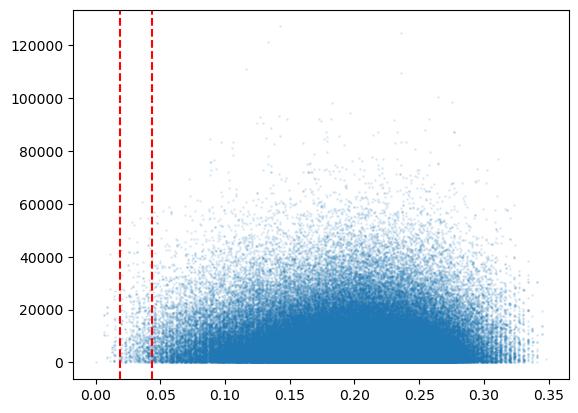

In [11]:
plt.plot(KK.flatten(), pk_grid.flatten(), 'o', markersize=1, alpha=0.1)
plt.axvline(k_edges[2], color='r', linestyle='--', label='k bins')
plt.axvline(k_edges[6], color='r', linestyle='--', label='k bins')

In [12]:
pk_average=np.zeros(k_bins.shape)
k_average=np.zeros(k_bins.shape)

for i in range(len(k_bins)):
    mask=(KK.flatten() > k_edges[i]) & (KK.flatten() < k_edges[i+1])
    pk_average[i]=np.mean(pk_grid.flatten()[mask].real)
    k_average[i]=np.mean(KK.flatten()[mask])
    print(k_average[i], pk_average[i])

0.009551442646012924 14980.45702677098
0.015323708359935542 9502.0795543451
0.021968541691629172 8914.366539352972
0.02782920534280784 12002.941776334319
0.03456787199258006 11285.422469304463
0.040738766868231926 9991.367309295641
0.04694515837016346 10337.317709812472
0.053089208167066936 9812.310469294649
0.059660652304468154 9292.670635721222
0.06582345375270628 9163.70095563404
0.0720836792909098 9923.028656618211
0.07829409168093532 9906.31426581312
0.08481748409823274 10058.479824084461
0.09102303411586703 10708.947919304666
0.0973506698619215 10184.228203648323
0.10346581808830141 9819.4805451389
0.10982342560041047 9991.971611648722
0.11618393433553946 10253.678197248428
0.12243896414138562 10062.882629275231
0.12869194536184891 9974.655541783235
0.13508810522598122 10038.774715952308
0.14122630088958257 9910.97382679356
0.14756792479845948 10195.711659587398
0.15378596076851697 9961.635410792962
0.160110180192618 9988.141997643044
0.1665107221290007 9873.486941221738
0.172822

Text(0, 0.5, 'pk [Mpc**3/h**3]')

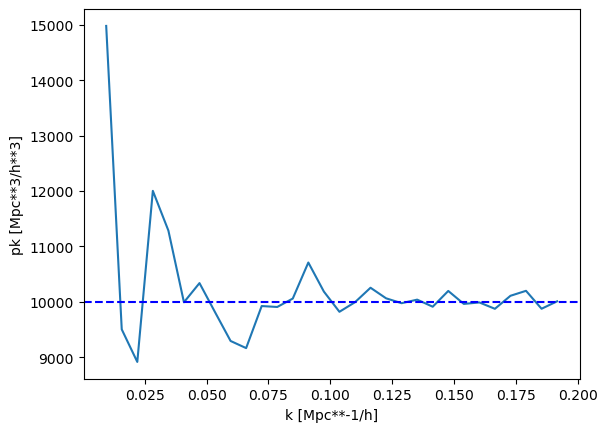

In [13]:
plt.plot(k_bins, pk_average, '-', markersize=5, label='pk average')
plt.axhline(1./density, color='b', linestyle='--', label='k bins')
plt.xlabel("k [Mpc**-1/h]")
plt.ylabel("pk [Mpc**3/h**3]")